In [1]:
from google.colab import drive
drive.mount('/content/drive')
#4/1AY0e-g6rVOjGgjFy68iSfl82wJOrq26yAar-X2cHaw5KU0sW4_xcVW2Mk0o
#4/1AY0e-g6D8NBiph8S8OdjFx618b7Kumw95cpBrumCv4u1N7zQgwygQogDW8w
#4/1AY0e-g6tS9NJ5hIJl_Y1GKI38JmtIZ9a54IseFmIjIiHpTrEXGZHiUx9gDw

Mounted at /content/drive


###### Sorting and importing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source 
from IPython.display import display

plt.style.use('classic') 

master = pd.read_csv('/content/drive/My Drive/Colab Notebooks/class_and_tutorials/Project/train-data.csv')
master = pd.DataFrame(data=master)

master = master.drop(columns='Location')
master = master.drop(columns='Name')
master = master.drop(columns='Fuel_Type')
master = master.drop(columns='Transmission')
master = master.drop(columns='New_Price')
master = master.drop(columns='Owner_Type')

original_column_Unnamed= master[['Unnamed: 0']]
changed_column_Unnamed=master[['Unnamed: 0']]
master = master.drop(columns='Unnamed: 0')
master3=master
master = master.dropna()         # remove all missing value from master 



# here we will remove the unwanted units. we only want the data. without the units.
master['Engine'] = master['Engine'].map(lambda x: x.rstrip('CC'))
master['Power'] = master['Power'].map(lambda x: x.rstrip('bhp'))
master['Mileage'] = master['Mileage'].map(lambda x: x.rstrip('kmpl'))
master['Mileage'] = master['Mileage'].map(lambda x: x.rstrip('km/kg'))

master['Mileage'] = master['Mileage'].str.extract('(\d+)', expand=False)
master['Mileage'] = master['Mileage'].astype(int)
master['Power'] = master['Power'].str.extract('(\d+)', expand=False)
master['Power'] = master['Mileage'].astype(int)
master['Engine'] = master['Engine'].str.extract('(\d+)', expand=False)
master['Engine'] = master['Engine'].astype(int)

# giving each column we going to use a name. easier to use that way.
Price=master['Price']
Year=master['Year']
Kilometers_Driven=master['Kilometers_Driven']
Engine=master['Engine']
Power=master['Power']
Seats=master['Seats']
Mileage=master['Mileage']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

##### Hists:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


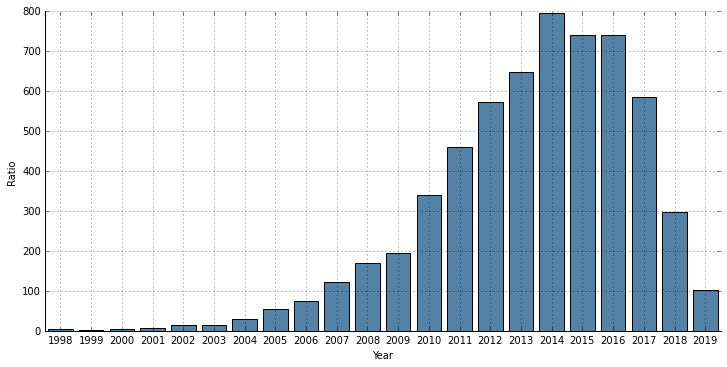

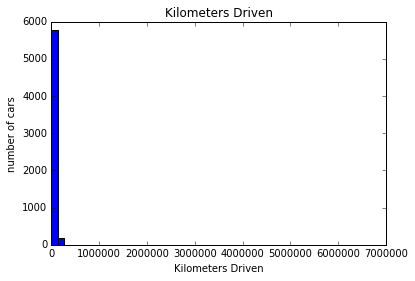

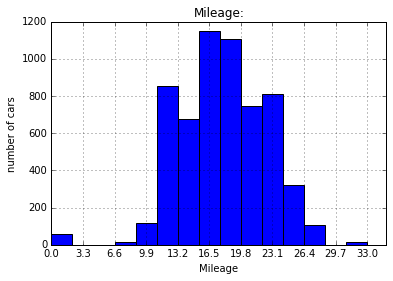

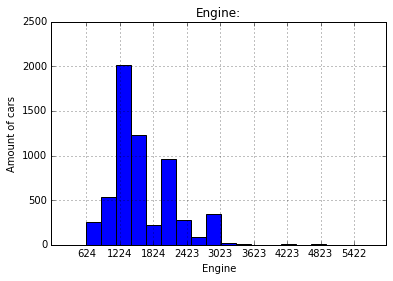

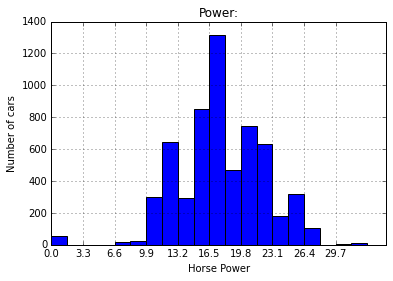

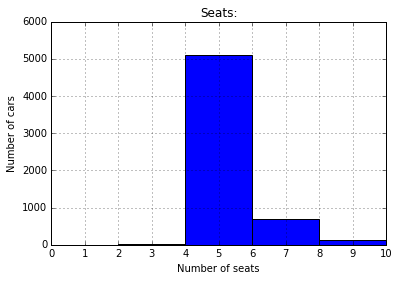

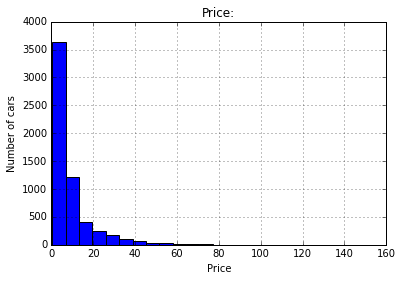

In [58]:
###### here starts my histograms


### Year: i wanted to try to do that with seaborn 
### sns. limit is 16, so i will use 'order' and give it a better range. (it took me the whole day to find it!!!!)
sns.axes_style('white')
W1 = sns.factorplot('Year', data=master, aspect=2, kind="count", color='steelblue',size=5,order=range(1998, 2020))
                                #d.set_xticklabels(step=21)
array1= np.arange(0,1000,100)        
array2= np.arange(0,10,1) 
W1.set_xticklabels()  
W1.set_yticklabels(array1) #np.arange(0, 255)
W1.set_ylabels("Ratio")
plt.grid(True)

plt.show()



# to show killometers with and without the outline, the gaint thing.

##### Kilometers_Driven######################## here are my problems starting,

Kilometers_Driven = master[['Kilometers_Driven']].max(axis=1)   #Arange Mileage column
plt.hist(Kilometers_Driven, bins=50) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.title('Kilometers Driven')

plt.show()

##### Mileage
Mileage = master[['Mileage']].max(axis=1)   #Arange Mileage column
plt.grid(True)
max_value = Mileage.max()   #will give us the highest index in the column
A = max_value/10    #10 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Mileage, bins=15) #rwidth=0.9 , bins=11
plt.xticks(np.arange(0, A*11, A))   #will give me order
plt.title('Mileage:')
plt.ylabel('number of cars')
plt.xlabel('Mileage')
plt.show()


###### Engine
Engine = master[['Engine']].max(axis=1)   #Arange  column
plt.grid(True) 
max_value = Engine.max()
min_value = Engine.min()   #i want my hist to start from the lowest number.
A = max_value/10    #10 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Engine,bins=20)
plt.xticks(np.arange(min_value, A*10, A))   #will give me order. +A is needed to give me edge.
plt.title('Engine:')
plt.ylabel('Amount of cars')
plt.xlabel('Engine')
plt.show()

###### Power
Power = master[['Power']].max(axis=1)   #Arange  column
plt.grid(True) 
max_value = Power.max()
min_value = Power.min()   #i want my hist to start from the lowest number.

A = max_value/10  #10 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Power,bins=20)
plt.xticks(np.arange(min_value, A*10, A))   #will give me order. +A is needed to give me edge.
plt.title('Power:')
plt.ylabel('Number of cars')
plt.xlabel('Horse Power')
plt.show()

###### Seats
Seats = master[['Seats']].max(axis=1)   #Arange  column
plt.grid(True) 
max_value = Seats.max()
min_value = Seats.min()   #i want my hist to start from the lowest number.
A = max_value/10   #12 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Seats,bins=5)
plt.xticks(np.arange(min_value, A*11, 1))   #will give me order. +A is needed to give me edge.
plt.title('Seats:')
plt.ylabel('Number of cars')
plt.xlabel('Number of seats')
plt.show()


###### Price
plt.grid(True)     
plt.hist(Price,bins=25)
plt.title('Price:')
plt.ylabel('Number of cars')
plt.xlabel('Price')
plt.show()



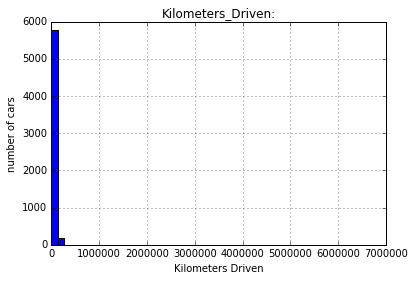

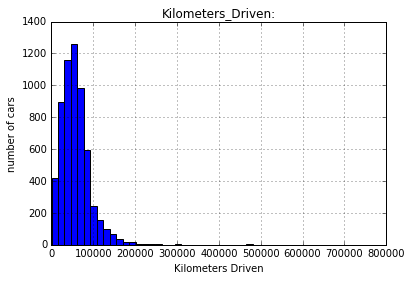

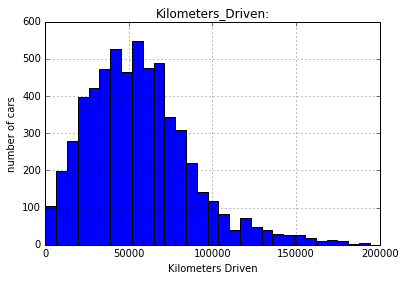

In [59]:
Kilometers_Driven = master[['Kilometers_Driven']].max(axis=1)   #Arange Mileage column
plt.hist(Kilometers_Driven, bins=50) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.title('Kilometers_Driven:')
plt.grid(True)     

plt.show()

Kilosub=master[['Kilometers_Driven']].max(axis=1)
Kilosub=Kilosub.drop(Kilosub.idxmax())


plt.title('Kilometers_Driven:')
plt.grid(True)     
plt.hist(Kilosub, bins=50) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.show()

Kilosub=master[['Kilometers_Driven']].max(axis=1)
for a in range(40): #here i will remove 50 columns. i will delete some data, but it will help me analayze it better
 Kilosub=Kilosub.drop(Kilosub.idxmax())


plt.title('Kilometers_Driven:')
plt.grid(True)     
plt.hist(Kilosub, bins=30) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.show()



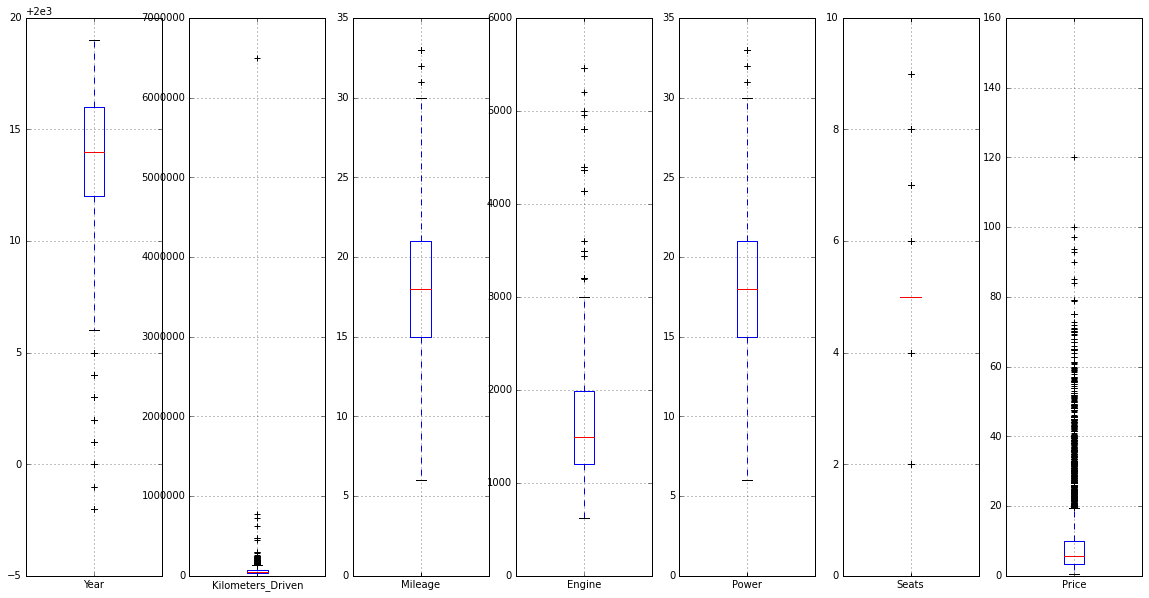

In [60]:
################################################ box plot:
master.plot(subplots=True, figsize=(20, 10), kind='box', grid=True  )
plt.show()

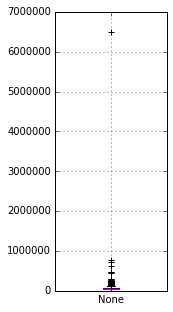

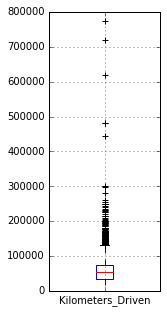

In [61]:
################################################ box plot kilometers: with and without.
Kilosub=master[['Kilometers_Driven']]
Kilosub=Kilosub.drop(Kilosub['Kilometers_Driven'].idxmax())
Kilometers_Driven.plot(subplots=True, figsize=(2,5), kind='box', grid=True  )
Kilosub.plot(subplots=True, figsize=(2,5), kind='box', grid=True  )

plt.show()



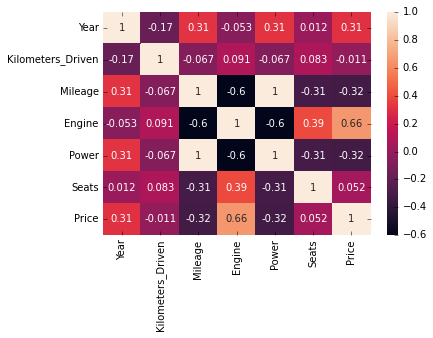

In [62]:
################# corralation :DDD
corrMatrix = master.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [63]:
###### i am going to calculate here the percentage of 
# what i have and what i had. i am going to see the difference 

x=len(master3)    #before dropna
y=len(master)     #after dropna
g=y*100/x
print(x)
print(y)
print(g)

########### #################
Price3=master3['Price']
Year3=master3['Year']
Kilometers_Driven3=master3['Kilometers_Driven']
Engine3=master3['Engine']
Power3=master3['Power']
Seats3=master3['Seats']
Mileage3=master3['Mileage']

x1=len(Price3)
x2=len(Year3)
x3=len(Kilometers_Driven3)
x4=len(Engine3)
x5=len(Power3)
x6=len(Seats3)
x7=len(Mileage3)

y1=len(Price)
y2=len(Year)
y3=len(Kilometers_Driven)
y4=len(Engine)
y5=len(Power)
y6=len(Seats)
y7=len(Mileage)

g1=y1*100/x1
g2=y2*100/x2
g3=y3*100/x3
g4=y4*100/x4
g5=y5*100/x5
g6=y6*100/x6
g7=y7*100/x7

print(f'Price: {g1}')
print(f'Year: {g2}')
print(f'Kilometers_Driven: {g3}')
print(f'Engine: {g4}')
print(f'Power: {g5}')
print(f'Seats: {g6}')
print(f'Mileage: {g7}')


# we can see the average score is equally distribute.

6019
5975
99.26898155839841
Price: 99.26898155839841
Year: 99.26898155839841
Kilometers_Driven: 99.26898155839841
Engine: 99.26898155839841
Power: 99.26898155839841
Seats: 99.26898155839841
Mileage: 99.26898155839841


##### Regressors:

In [13]:
#################################################################
#here we going to start working on regressors and error rates.
#################################################################
import numpy as np
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
#from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

%matplotlib inline


from sklearn.model_selection import train_test_split
x, y = master.drop('Price', axis=1), master.Price #master.Price will give different results in mean_squared_error #master[['Price']]
train_test_ratio = 0.2 #test it with 0.2 and 0.9 compare data for personal refrences
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=train_test_ratio, random_state=0, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4780, 6), (4780,), (1195, 6), (1195,))

###### Mean_Squared_Error

In [14]:
from sklearn.metrics import mean_squared_error
models_errors = {}

average_train = y_train.mean()
y_pred = np.ones_like(y_test) * average_train
model_mse = mean_squared_error(y_test, y_pred)
models_errors['Baseline'] = model_mse
model_mse

105.48575907412337

##### 3.Linear Regressor


In [11]:
###############################################################
#3.Linear Regressor
###############################################################

def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean squared error is {1:.4f} (mse train {2:.4f})'
          .format(model_name, mse, mse_train))
    return mse

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
model_mse = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
model_name = linear_regressor.__class__.__name__
models_errors[model_name] = model_mse

#############################
# AS YOU CAN SEE, LinearRegression error is too big, so it is not useful. we are not going to play with it no more.
#

NameError: ignored

#### 5. Decusuib Tree Regressor

In [29]:
# i chose number 5. Decision Tree Regressor, because it shows me the lowest error rate.
#
#5.DecisionTreeRegressor 
##################################################################
from sklearn.tree import DecisionTreeRegressor
def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean squared error is {1:.4f} (mse train {2:.4f})'.format(model_name, mse, mse_train))
    return mse

max_depth = 6
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mse = check_regressor(decision_tree, X_train, y_train, X_test, y_test)
model_name = decision_tree.__class__.__name__
models_errors[model_name] = model_mse
################ HERE WE CAN SEE IT IS SMALLER. BUT STILL TOO BIG.
M1E = models_errors[model_name]
M1M = model_mse

DecisionTreeRegressor mean squared error is 36.1248 (mse train 20.7424)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

x.shape, y.shape


((5975, 6), (5975, 1))

In [47]:
######## 10 fold validation

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(decision_tree, X_train, y_train, scoring='r2', cv=folds)
print(scores)
TreeFold = scores
decision_tree.fit(X_train, y_train)

TreeFoldAC=print(f'train accuracy={decision_tree.score(X_train, y_train)}')
TreeFold

[0.80206767 0.63493392 0.79918147 0.71920528 0.77854436 0.75824838
 0.82220374 0.66358161 0.79487262 0.59907067]
train accuracy=0.8511192098118171


array([0.80206767, 0.63493392, 0.79918147, 0.71920528, 0.77854436,
       0.75824838, 0.82220374, 0.66358161, 0.79487262, 0.59907067])

##### Leave one out!

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
#from tqdm import tqdm
#!pip install -U scikit-learn


x = master[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
y = master[['Price']]
x.shape,y.shape
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5, test_size=0.5)

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple decision_tree model
model = decision_tree

#use LOOCV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv)
#view mean absolute error
TreeLeave=mean(absolute(scores))
TreeLeave

2.6498469167276713

##### HoldOut

In [37]:
################ HOLD OUT
#!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import mean

# split the data with 50% in train set
X1, X2, y1, y2 = train_test_split(x, y, random_state=0,train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
#accuracy_score(y2, y2_model)
TreeHold=mean(absolute(y2_model))
TreeHold

9.32578843074653

In [27]:
x=master[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
y=master[['Price']]
x.shape
y.shape
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.5,random_state=0) 

#### Second choice


In [ ]:
###############################################################
#SECOND CHOICES: 3.Linear Regressor
###############################################################

def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = regressor.predict(x_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean squared error is {1:.4f} (mse train {2:.4f})'
          .format(model_name, mse, mse_train))
    return mse

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
model_mse = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
model_name = linear_regressor.__class__.__name__
models_errors[model_name] = model_mse


STARTING COMPARE BETWEEN THE TWO.

In [ ]:
####### 10 cross valadation 

import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
X = master3.iloc[:, [0, 5]]
y = master3.iloc[:, 6]
#X=master[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
#y=master[['Price']]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(X):
  if X.any()==False:
    pass
  else:
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    if X_train.any()==np.nan or y_train.any()==np.nan:
     best_svr.fit(X_train, y_train)
     scores.append(best_svr.score(X_test, y_test))
    else:
     pass

#best_svr.fit(X_train, y_train)
#scores.append(best_svr.score(X_test, y_test))
print(np.mean(scores))


In [ ]:
#cross_val_score(best_svr, X, y, cv=10)
#cross_val_predict(best_svr, X, y, cv=10)


##### Compare with HOLD-OUT

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5, test_size=0.5)


In [ ]:
from sklearn.metrics import mean_squared_error
models_errors = {}

average_train = y_train.mean()
y_pred = np.ones_like(y_test) * average_train
model_mse = mean_squared_error(y_test, y_pred)
models_errors['Baseline'] = model_mse
model_mse

105.48575907412337

###### 10 K-FOLD

In [ ]:

# evaluate model by calculating the score across all predictions
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




# create the inputs and outputs
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# k-fold cross validation
data_y, data_yhat = list(), list()
kfold = KFold(n_splits=10, shuffle=True)
# enumerate splits
#for train_ix, test_ix in kfold.split(x):
	# get data
	#X_train, X_test = x[train_ix], x[test_ix]
	#y_train, y_test = y[train_ix], y[test_ix]
	# fit model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
	# make predictions

yhat = model.predict(X_test)
	# store
data_y.extend(y_test)
data_yhat.extend(yhat)
# evaluate the model
acc = accuracy_score(data_y, data_yhat)
print('Accuracy: %.3f' % (acc))




ValueError: ignored

In [ ]:
from sklearn.svm import SVR
!pip install sklearn

#Grid Search
parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},{'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4]}]

#2. Type of regressor 
reg = SVR(C=1)

#3. Regression evaluation cannot be done using f1_macro, so updated NMSE
clf = GridSearchCV(reg, parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)

ModuleNotFoundError: ignored

#### Linear Regression


In [ ]:

# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [ ]:
# recaling the variables (both)
master_columns = master.columns
scaler = MinMaxScaler()
master4 = scaler.fit_transform(master)

# rename columns (since now its an np array)
master4 = pd.DataFrame(master4)
master.columns = master_columns

master4.head()

,0,1,2,3,4,5,6
0,0.571429,0.011051,0.787879,0.069594,0.787879,0.5,0.008210
1,0.809524,0.006282,0.575758,0.178266,0.575758,0.5,0.075583
2,0.619048,0.007051,0.545455,0.106997,0.545455,0.5,0.025445
3,0.666667,0.013359,0.606061,0.116115,0.606061,0.7,0.034846
4,0.714286,0.006231,0.454545,0.250093,0.454545,0.5,0.108423


In [ ]:
# split into train and test
master_train, master_test = train_test_split(master4, train_size = 0.7, test_size = 0.3, random_state = 10)
print(len(master_train))
print(len(master_test))
master

4182
1793


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26,998,26,5.0,1.75
1,2015,41000,19,1582,19,5.0,12.50
2,2011,46000,18,1199,18,5.0,4.50
3,2012,87000,20,1248,20,7.0,6.00
4,2013,40670,15,1968,15,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014,27365,28,1248,28,5.0,4.75
6015,2015,100000,24,1120,24,5.0,4.00
6016,2012,55000,14,2498,14,8.0,2.90
6017,2013,46000,18,998,18,5.0,2.65


In [ ]:
# split into X and y
X = master.loc[:, ['Year', 'Kilometers_Driven','Mileage','Engine','Power','Seats']]
y = master['Price']

# creating dummy variables for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

# convert into dummies
cars_dummies = pd.get_dummies(X, drop_first=True)
cars_dummies.head()

# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=6)

In [ ]:
# creating a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(0, 6))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(3763, 0)) while a minimum of 1 is required.

  Number of test samples.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(3763, 0)) while a minimum of 1 is required.

  Number of test samples.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature

GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [0, 1, 2, 3, 4, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.026175,0.006109,0.000000,0.000000,0,{'n_features_to_select': 0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.022964,0.005167,0.001856,0.000251,1,{'n_features_to_select': 1},0.408923,-0.003450,0.002347,0.088518,0.081105,0.068548,-0.003428,-0.002771,0.097445,-0.003741,0.073350,0.119195,5,0.439945,0.000185,0.000975,0.103833,0.104329,0.104908,0.000221,0.000175,0.102720,0.000229,0.085752,0.127766
2,0.022396,0.006173,0.001752,0.000093,2,{'n_features_to_select': 2},0.409107,-0.002664,0.001748,0.088516,0.081023,0.067959,-0.003212,-0.002141,0.097493,-0.003741,0.073409,0.119181,4,0.439960,0.000157,0.001035,0.103829,0.104324,0.104892,0.000207,0.000201,0.102687,0.000229,0.085752,0.127766
3,0.027249,0.007738,0.003608,0.002326,3,{'n_features_to_select': 3},0.421196,0.081822,0.060738,0.247652,0.081020,0.297217,0.142998,0.091553,0.097475,0.079279,0.160095,0.115038,3,0.447832,0.097498,0.096517,0.290338,0.104321,0.284547,0.097606,0.096674,0.102705,0.098473,0.171651,0.118321
4,0.027950,0.009795,0.003396,0.002300,4,{'n_features_to_select': 4},0.420566,0.080810,0.066624,0.247595,0.427971,0.296291,0.142950,0.091894,0.103477,0.079895,0.195807,0.135152,2,0.447760,0.097372,0.096062,0.290299,0.447055,0.284509,0.097605,0.096565,0.106480,0.098226,0.206193,0.141052
5,0.025313,0.007765,0.001778,0.000088,5,{'n_features_to_select': 5},0.420548,0.232221,0.680138,0.247623,0.510954,0.292798,0.140792,0.290799,0.103644,0.589617,0.350913,0.182448,1,0.447845,0.292861,0.600614,0.290266,0.492400,0.299262,0.097562,0.287172,0.106380,0.543880,0.345824,0.163250


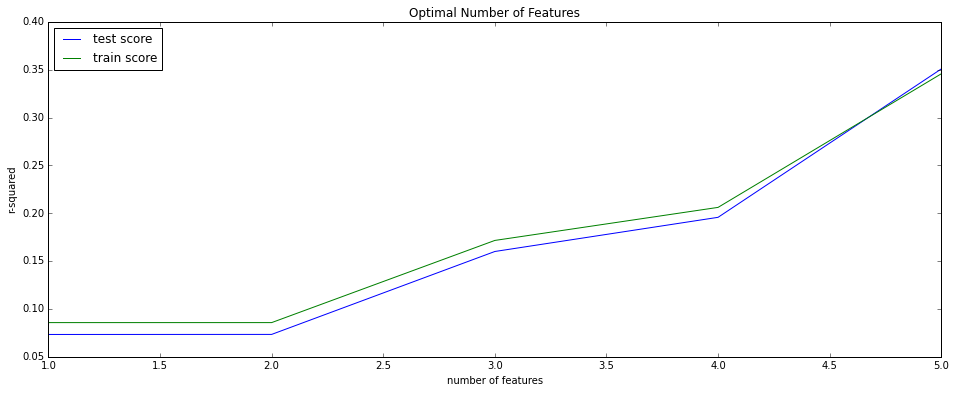

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results[["param_n_features_to_select"]], cv_results[["mean_test_score"]])
plt.plot(cv_results[["param_n_features_to_select"]], cv_results[["mean_train_score"]])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
import numpy as np
from sklearn.model_selection import KFold


kf = KFold(n_splits=10)
for train, test in kf.split(X):
 print("%s %s" % (train, test))

[ 598  599  600 ... 5972 5973 5974] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

##### leave one out


In [ ]:
from sklearn.model_selection import LeaveOneOut
X = master
loo = LeaveOneOut()
for train, test in loo.split(X):
 print("%s %s" % (train, test))

Streaming output truncated to the last 5000 lines.
[   0    1    2 ... 5972 5973 5974] [975]
[   0    1    2 ... 5972 5973 5974] [976]
[   0    1    2 ... 5972 5973 5974] [977]
[   0    1    2 ... 5972 5973 5974] [978]
[   0    1    2 ... 5972 5973 5974] [979]
[   0    1    2 ... 5972 5973 5974] [980]
[   0    1    2 ... 5972 5973 5974] [981]
[   0    1    2 ... 5972 5973 5974] [982]
[   0    1    2 ... 5972 5973 5974] [983]
[   0    1    2 ... 5972 5973 5974] [984]
[   0    1    2 ... 5972 5973 5974] [985]
[   0    1    2 ... 5972 5973 5974] [986]
[   0    1    2 ... 5972 5973 5974] [987]
[   0    1    2 ... 5972 5973 5974] [988]
[   0    1    2 ... 5972 5973 5974] [989]
[   0    1    2 ... 5972 5973 5974] [990]
[   0    1    2 ... 5972 5973 5974] [991]
[   0    1    2 ... 5972 5973 5974] [992]
[   0    1    2 ... 5972 5973 5974] [993]
[   0    1    2 ... 5972 5973 5974] [994]
[   0    1    2 ... 5972 5973 5974] [995]
[   0    1    2 ... 5972 5973 5974] [996]
[   0    1    2 ... 5972 

#### USING Linear Regression

In [31]:
###############################################################
#3.Linear Regressor
###############################################################
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

linear_regressor = LinearRegression()
model_mse = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
model_name = linear_regressor.__class__.__name__
models_errors[model_name] = model_mse


M2E=models_errors[model_name]
M2M=model_mse

LinearRegression mean squared error is 60.3197 (mse train 50.3258)


##### 10 FOLD

In [48]:
# k-fold CV 
lm = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
print(scores)
LinearFold = scores

##### Linear regression accyracy
lm.fit(X_train, y_train)
print(f'train accuracy={lm.score(X_train, y_train)}')
mean(absolute(scores))
LinearFoldAC=print(f'train accuracy={lm.score(X_train, y_train)}')
LinearFoldAC

[ 0.61978275  0.61975882  0.58707964  0.63853764  0.60990738  0.64907951
  0.67449009  0.60774059 -1.08521806  0.65178653]
train accuracy=0.6346320572129363
train accuracy=0.6346320572129363


In [ ]:
def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean squared error is {1:.4f} (mse train {2:.4f})'.format(model_name, mse, mse_train))
    return mse

###### Leave one-out!

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

x = master[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
y = master[['Price']]

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = linear_regressor

#use LOOCV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv)

#view mean absolute error
LinearLeave=mean(absolute(scores))
LinearLeave

4.415121114059522

##### HoldOut

In [42]:
################ HOLD OUT
#!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import mean

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(x, y, random_state=0,train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
#accuracy_score(y2, y2_model)
LinearHold=mean(absolute(y2_model))

#### sqaure


In [70]:
from sklearn.metrics import mean_squared_error
models_errors = {}

average_train = y_train.mean()
y_pred = np.ones_like(y_test) * average_train
model_mse = mean_squared_error(y_test, y_pred)
models_errors['Baseline'] = model_mse
model_mse


# k-fold CV (using all the 6 variables)
model_mse = LinearRegression()
scores = cross_val_score(model_mse, X_train, y_train, scoring='neg_mean_squared_error', cv=6)

print('Year Kilometers_Driven Mileage    Engine     Power      Seats')
print(scores)
from sklearn.model_selection import train_test_split

model_mse.fit(X_train, y_train)
print(f'train accuracy={model_mse.score(X_train, y_train)}')
#print(f'test accuracy={model_mse.score(X_test, y_test)}')

ValueError: ignored

########### FINAL FORM

In [69]:
print('Tree  Fold: ',TreeFold)
print('Linear Fold:',LinearFold)
print('\n')
print('Tree Leave One Out:', TreeLeave)
print('Linear Leave One Out:', LinearLeave)
print('\n')
print('Tree Hold Out: ', TreeHold)
print('Linear Hold Out: ', LinearHold)


#print('Linear Fold: ',LinearFold)
#print('Linear Leave One Out:', LinearLeave)
#print('Linear Hold Out: ', LinearHold)
print('\n')
print(M1E)
print(M2E)

Tree  Fold:  [0.80206767 0.63493392 0.79918147 0.71920528 0.77854436 0.75824838
 0.82220374 0.66358161 0.79487262 0.59907067]
Linear Fold: [ 0.61978275  0.61975882  0.58707964  0.63853764  0.60990738  0.64907951
  0.67449009  0.60774059 -1.08521806  0.65178653]


Tree Leave One Out: 2.6498469167276713
Linear Leave One Out: 4.415121114059522


Tree Hold Out:  9.32578843074653
Linear Hold Out:  10.320078672442419


36.12480875195294
60.31966368886109
